# Práctica 4

## Ejercicio 1

En el algoritmo de back-propagation, en la fórmula (6.18) del Herz, es necesario agregar sobre h una componente extra que puede ser escencialmente cualquier cosa. ¿Por qué es necesario agregarla? Viene del hecho de que la neurona bias no tiene ningún input, pero las demás sí.

### Importo dependencias

In [1]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)

### Defino datos

In [2]:
#Def regla XOR
def XOR(x1, x2):
    #x1, x2: +1 o -1
    if x1 == x2:
        return 1
    else:
        return 0

#Def datos x e y
x_data = np.empty([4, 2])
y_data = np.empty(4)

x_data[0] = np.array([1,1])
x_data[1] = np.array([1,-1])
x_data[2] = np.array([-1,1])
x_data[3] = np.array([-1,-1])

for i in range(len(y_data)):
    y_data[i] = XOR(x_data[i][0], x_data[i][1])


### Defino funciones

In [3]:
#Def la aplicación de una red
def red_forward(x_test, red):
    V_0 = np.concatenate((x_test, np.array([-1])), axis = 0) #Agrego el bias 3x1
    for j in range(len(red["pesos"])):
        w = red["pesos"][j]
        h = np.dot(w.T, V_0)
        if j != len(red["pesos"]) - 1:
            V_1 = np.concatenate((g(h), np.array([-1])), axis = 0) #3x1
        else: #Si estoy en la última capa
            V_1 = g(h)
        V_0 = V_1
    return V_1[0]

#Def función de validación
def validacion(x_test, y_test, red):
    error = 0

    for i in range(len(y_test)):
        #Forward pass
        y_out = red_forward(x_test[i], red)

        #Calculo el error
        error += np.abs(y_test[i] - np.round(y_out)) #Da 0 si no hay error y 1 si hay error

    return error/len(y_test)

def e_loss(x_test, y_test, red):
    error = 0

    for i in range(len(y_test)):
        #Forward pass
        y_out = red_forward(x_test[i], red)
        #Calculo el error
        error += (y_test[i] - y_out)**2

    return error/2

#Def función de transferencia
def g(h_vec):

    return np.tanh(h_vec)

def g_prima(h_vec):
    return 1 - g(h_vec)**2

### Def redes

In [4]:
np.random.seed(1)
w_ini_max = 1
red_A = {"input":2, "hidden":2, "output":1, "pesos":[np.random.rand(3,2)*w_ini_max, np.random.rand(3,1)*w_ini_max]}



### Back-propagation

In [5]:

#Def algoritmo de retropropagación de errores
def back_propagation(x_data, y_data, red, eta):
    #Se usa la nomenclatura del Hertz

    #Loop sobre las muestras
    for i in range(len(y_data)):   
        #Forward pass
        V_0 = np.concatenate((x_data[i], np.array([-1])), axis = 0) #Agrego el bias 3x1
        w_1 = red["pesos"][0] #3x2
        h_1 = np.dot(w_1.T, V_0) #2x1
        V_1 = np.concatenate((g(h_1), np.array([-1])), axis = 0) #3x1

        w_2 = red["pesos"][1] #3x1
        h_2 = np.dot(w_2.T, V_1) #1x1
        V_2 = g(h_2) #1x1

        #Backward
        #Calculo el error de la capa de salida
        delta_2 = g_prima(h_2)*(y_data[i] - V_2) #1x1

        #Calculo el error de la capa oculta
        # delta_1 = g_prima(h_1)*np.dot(w_2, delta_2) #
        delta_1 = np.concatenate([g_prima(h_1),np.array([1])])*np.dot(w_2, delta_2) #3x1

        #Actualizo pesos
        w_1 += eta * np.outer(V_0, delta_1[:2]) #3x2
        w_2 += eta * np.outer(V_1, delta_2)

        red["pesos"] = [w_1, w_2]

    return red

#Def algoritmo de aprendizaje
def aprendizaje(x_data, y_data, red, eta, epochs = 1):
    #Def array de errores
    e_loss_vec = np.empty(epochs)
    validacion_vec = np.empty(epochs)

    #Loop sobre las epochs
    for i in range(epochs):
        #Backpropagation
        red = back_propagation(x_data, y_data, red, eta)
        
        #Cálculo de errores
        e_loss_vec[i] = e_loss(x_data, y_data, red)
        validacion_vec[i] = validacion(x_data, y_data, red)


    return red, e_loss_vec, validacion_vec


### Aprendizaje

In [6]:
#Entreno red A
eta = 0.1
model_A = aprendizaje(x_data, y_data, red_A, eta, epochs = 1000)

#Entreno red B


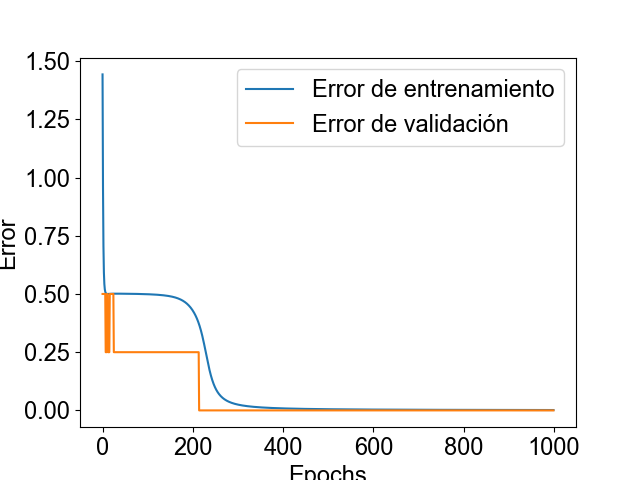

In [7]:
#Grafico

fig, ax = plt.subplots()
ax.plot(model_A[1], label = "Error de entrenamiento")
ax.plot(model_A[2], label = "Error de validación")
ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.legend()
plt.show()